In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
groceries = []
with open("groceries.csv") as f:
    groceries = f.read()

In [3]:
# splitting the data into separate transactions using separator as "\n"
groceries = groceries.split("\n")

In [4]:
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

In [5]:
all_groceries_list = [i for item in groceries_list for i in item]

In [7]:
from collections import Counter # ,OrderedDict
item_frequencies = Counter(all_groceries_list)

In [9]:
# after sorting
item_frequencies = sorted(item_frequencies.items(), key = lambda x:x[1])

In [11]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

In [12]:
# barplot of top 10 
import matplotlib.pyplot as plt

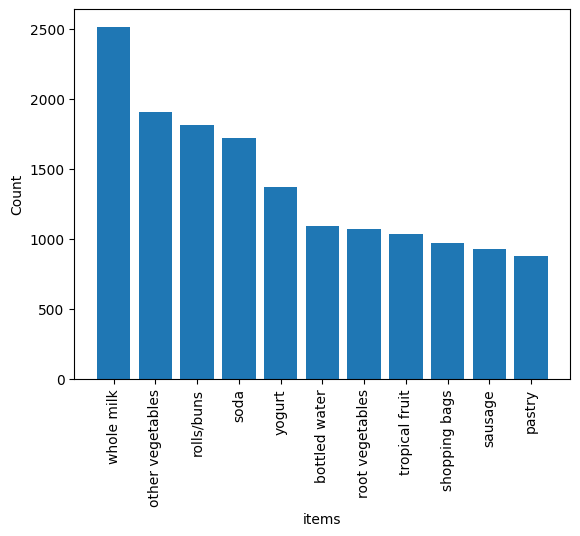

In [16]:
plt.bar(height = frequencies[0:11], x = list(range(0, 11)))
plt.xticks(list(range(0, 11), ), items[0:11], rotation = 90)
plt.xlabel("items")
plt.ylabel("Count")
plt.show()

In [15]:
# Creating Data Frame for the transactions data
groceries_series = pd.DataFrame(pd.Series(groceries_list))
groceries_series = groceries_series.iloc[:9835, :] # removing the last empty transaction

In [17]:
groceries_series.columns = ["transactions"]

In [18]:
# creating a dummy columns for the each item in each transactions ... Using column names as item name
X = groceries_series['transactions'].str.join(sep = '*').str.get_dummies(sep = '*')

In [19]:
X

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
frequent_itemsets = apriori(X, min_support = 0.0075, max_len = 4, use_colnames = True)

In [21]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)

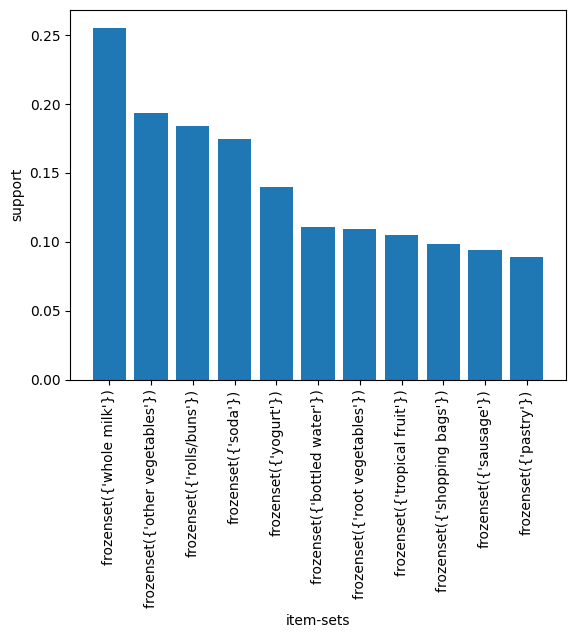

In [24]:
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11])
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=90)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [25]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1170,"(whole milk, tropical fruit)","(yogurt, other vegetables)",0.042298,0.043416,0.007626,0.180288,4.152546,0.005789,1.166976
1175,"(yogurt, other vegetables)","(whole milk, tropical fruit)",0.043416,0.042298,0.007626,0.175644,4.152546,0.005789,1.161758
1091,"(root vegetables, yogurt)","(whole milk, other vegetables)",0.025826,0.074835,0.007829,0.303150,4.050919,0.005896,1.327638
1090,"(whole milk, other vegetables)","(root vegetables, yogurt)",0.074835,0.025826,0.007829,0.104620,4.050919,0.005896,1.088000
792,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
793,(whipped/sour cream),(berries),0.071683,0.033249,0.009049,0.126241,3.796886,0.006666,1.106428
1174,"(tropical fruit, other vegetables)","(whole milk, yogurt)",0.035892,0.056024,0.007626,0.212465,3.792358,0.005615,1.198645
1171,"(whole milk, yogurt)","(tropical fruit, other vegetables)",0.056024,0.035892,0.007626,0.136116,3.792358,0.005615,1.116016
1049,"(beef, other vegetables)",(root vegetables),0.019725,0.108998,0.007931,0.402062,3.688692,0.005781,1.490123
1052,(root vegetables),"(beef, other vegetables)",0.108998,0.019725,0.007931,0.072761,3.688692,0.005781,1.057197


In [27]:
def to_list(i):
    return (sorted(list(i)))

In [28]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

In [29]:
ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

In [30]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [31]:
index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [32]:
# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]

In [33]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
792,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
582,"(whole milk, yogurt)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078
1048,"(root vegetables, other vegetables)",(beef),0.047382,0.052466,0.007931,0.167382,3.190313,0.005445,1.138018
1004,"(whole milk, root vegetables)",(beef),0.048907,0.052466,0.008033,0.164241,3.130449,0.005467,1.133741
172,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
534,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
360,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
974,"(root vegetables, yogurt)",(tropical fruit),0.025826,0.104931,0.008134,0.314961,3.001587,0.005424,1.306594
1064,"(whipped/sour cream, tropical fruit)",(other vegetables),0.013828,0.193493,0.007829,0.566176,2.926088,0.005154,1.859068
784,"(citrus fruit, whole milk)",(tropical fruit),0.030503,0.104931,0.009049,0.296667,2.827245,0.005849,1.272609
